In [694]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [695]:
# Задавание начальной точки
A = {'X':4, 'Y':2}

BVEC = {'X':1, 'Y':8}
# Задавание базис вектора

dist_BVEC = np.round(np.sqrt( (BVEC['X'] - A['X'])**2 + (BVEC['Y'] - A['Y'])**2 ), 2)
dist_BVEC

np.float64(6.71)

In [696]:
import sympy as sp

x, y = sp.symbols('x y')
eq1 = x**2 + y**2 - 1
eq2 = x*y - 0.5

# Решение системы уравнений с помощью solve
solution = sp.solve((eq1, eq2), (x, y))

print("Символическое решение системы уравнений:")
print(solution)

Символическое решение системы уравнений:
[(-0.707106781186548, -0.707106781186548), (0.707106781186548, 0.707106781186548)]


In [697]:
A = [1, 3]
B = [5, 4]
C = [5, 2]
D = [2, 1]
E = [3, 4]

In [698]:
d_AB = np.round(np.sqrt( (B[0] - A[0])**2 + (B[1] - A[1])**2 ), 2)

d_AC = np.round(np.sqrt( (C[0] - A[0])**2 + (C[1] - A[1])**2 ), 2)

d_AD = np.round(np.sqrt( (D[0] - A[0])**2 + (D[1] - A[1])**2 ), 2)

d_AE = np.round(np.sqrt( (E[0] - A[0])**2 + (E[1] - A[1])**2 ), 2)


d_BC = np.round(np.sqrt( (C[0] - B[0])**2 + (C[1] - B[1])**2 ), 2)
d_BD = np.round(np.sqrt( (D[0] - B[0])**2 + (D[1] - B[1])**2 ), 2)
d_BE = np.round(np.sqrt( (E[0] - B[0])**2 + (E[1] - B[1])**2 ), 2)

d_CD = np.round(np.sqrt( (D[0] - C[0])**2 + (D[1] - C[1])**2 ), 2)
d_CE = np.round(np.sqrt( (E[0] - C[0])**2 + (E[1] - C[1])**2 ), 2)

d_DE = np.round(np.sqrt( (E[0] - D[0])**2 + (E[1] - D[1])**2 ), 2)

print(d_AB, d_AC, d_AD, d_AE)

4.12 4.12 2.24 2.24


In [699]:
d_AB = np.round(np.sqrt( (B[0] - A[0])**2 + (B[1] - A[1])**2 ), 2)
d_AC = np.round(np.sqrt( (C[0] - A[0])**2 + (C[1] - A[1])**2 ), 2)
d_AD = np.round(np.sqrt( (D[0] - A[0])**2 + (D[1] - A[1])**2 ), 2)
d_AE = np.round(np.sqrt( (E[0] - A[0])**2 + (E[1] - A[1])**2 ), 2)
d_BC = np.round(np.sqrt( (C[0] - B[0])**2 + (C[1] - B[1])**2 ), 2)
d_BD = np.round(np.sqrt( (D[0] - B[0])**2 + (D[1] - B[1])**2 ), 2)
d_BE = np.round(np.sqrt( (E[0] - B[0])**2 + (E[1] - B[1])**2 ), 2)
d_CD = np.round(np.sqrt( (D[0] - C[0])**2 + (D[1] - C[1])**2 ), 2)
d_CE = np.round(np.sqrt( (E[0] - C[0])**2 + (E[1] - C[1])**2 ), 2)
d_DE = np.round(np.sqrt( (E[0] - D[0])**2 + (E[1] - D[1])**2 ), 2)

In [700]:
import numpy as np
from scipy.optimize import minimize

d_AB = np.round(np.sqrt( (B[0] - A[0])**2 + (B[1] - A[1])**2 ), 2)

d_AC = np.round(np.sqrt( (C[0] - A[0])**2 + (C[1] - A[1])**2 ), 2)

d_AD = np.round(np.sqrt( (D[0] - A[0])**2 + (D[1] - A[1])**2 ), 2)

d_AE = np.round(np.sqrt( (E[0] - A[0])**2 + (E[1] - A[1])**2 ), 2)

# Данные
distances = np.array([
    [0, d_AB, d_AC, d_AD, d_AE],
    [d_AB, 0, d_BC, d_BD, d_BE],
    [d_AC, d_BC, 0, d_CD, d_CE],
    [d_AD, d_BD, d_CD, 0, d_DE],
    [d_AE, d_BE, d_CE, d_DE, 0],
])

# Координаты точки A
x_A, y_A = 0, 0

# Целевая функция для минимизации
def error_function(coords):
    coords = coords.reshape(-1, 2)
    total_error = 0
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            if distances[i, j] > 0:
                dist_ij = np.linalg.norm(coords[i] - coords[j])
                total_error += (dist_ij - distances[i, j])**2
    return total_error

# Начальные приближения для координат точек B, C, D, E
initial_coords = np.random.rand(4, 2)  # случайные значения

# Добавляем точку A в систему
initial_coords = np.vstack(([x_A, y_A], initial_coords))

# Оптимизация
result = minimize(error_function, initial_coords[1:].flatten(), method='L-BFGS-B')

# Извлечение координат
optimized_coords = result.x.reshape(-1, 2)
print("Координаты точек B, C, D, E:")
for i, coord in enumerate(optimized_coords, start=1):
    print(f"Точка {chr(65 + i)}: {coord}")

Координаты точек B, C, D, E:
Точка B: [-1.62480503 -0.00663428]
Точка C: [ 2.44923444 -0.61660489]
Точка D: [2.25779776 1.37380803]
Точка E: [-0.82069013  2.08369281]


In [701]:
print(f'Точка B: {B}')
print(f'Точка C: {C}')
print(f'Точка D: {D}')
print(f'Точка E: {E}')

Точка B: [5, 4]
Точка C: [5, 2]
Точка D: [2, 1]
Точка E: [3, 4]


In [702]:
A = [1, 3]
B = [5, 4]
C = [5, 2]
D = [2, 1]
E = [3, 4]

d_AB = np.round(np.sqrt( (B[0] - A[0])**2 + (B[1] - A[1])**2 ), 2)

d_AC = np.round(np.sqrt( (C[0] - A[0])**2 + (C[1] - A[1])**2 ), 2)

d_AD = np.round(np.sqrt( (D[0] - A[0])**2 + (D[1] - A[1])**2 ), 2)

d_AE = np.round(np.sqrt( (E[0] - A[0])**2 + (E[1] - A[1])**2 ), 2)


d_BC = np.round(np.sqrt( (C[0] - B[0])**2 + (C[1] - B[1])**2 ), 2)
d_BD = np.round(np.sqrt( (D[0] - B[0])**2 + (D[1] - B[1])**2 ), 2)
d_BE = np.round(np.sqrt( (E[0] - B[0])**2 + (E[1] - B[1])**2 ), 2)

d_CD = np.round(np.sqrt( (D[0] - C[0])**2 + (D[1] - C[1])**2 ), 2)
d_CE = np.round(np.sqrt( (E[0] - C[0])**2 + (E[1] - C[1])**2 ), 2)

d_DE = np.round(np.sqrt( (E[0] - D[0])**2 + (E[1] - D[1])**2 ), 2)

In [703]:
A = [1, 3]
B = [5, 4]
C = [5, 2]

d_AB = np.round(np.sqrt( (B[0] - A[0])**2 + (B[1] - A[1])**2 ))
d_AB

np.float64(4.0)

In [ ]:
# решние через метод наимешьних квадратов

# Коэф смещения  от YMAPS to OSM

In [704]:
osm = {"BaseStations": [  
    { 
        "Id": 3, 
        "Lat": 53.208388, 
        "Lon": 50.259608, 
        "Alt": 160.5
    }, 
    { 
        "Id": 4, 
        "Lat": 53.209152, 
        "Lon": 50.259474, 
        "Alt": 160.5
    }, 
    { 
        "Id": 5, 
        "Lat": 53.208839, 
        "Lon": 50.259005, 
        "Alt": 161 
    }, 
    { 
        "Id": 6, 
        "Lat": 53.208654, 
        "Lon": 50.260126, 
        "Alt": 160.05
    } 
]}

In [705]:
yamaps = {
    "BaseStations": [  
    { 
        "Id": 3, 
        "Lat": 53.208435, 
        "Lon": 50.259643, 
        "Alt": 160.5
    }, 
    { 
        "Id": 4, 
        "Lat": 53.209203, 
        "Lon": 50.259579, 
        "Alt": 160.5
    }, 
    { 
        "Id": 5, 
        "Lat": 53.208889, 
        "Lon": 50.259080, 
        "Alt": 161 
    }, 
    { 
        "Id": 6, 
        "Lat": 53.208728, 
        "Lon": 50.260190, 
        "Alt": 160.05
    } 
]
}

In [706]:
Lat_OSM = [53.20855192014434,
           53.208553383710786,
           53.20855457532494,
           53.20855544630893,
           53.20851252732736,
           53.20855777151049,
           53.20855815304921,
           53.208557982356126,
           53.20855795305121,
           53.20855784759858]


Lon_OSM = [50.259929406086705,
           50.25992566359954,
           50.25992163578689,
           50.25991971619241,
           50.25924711803691,
           50.25986671400724,
           50.2598659434171,
           50.25986636017503,
           50.25986615440991,
           50.25986631431613]

In [707]:
Lat_YM = [53.208588658953516,
          53.208590241641225,
          53.208591562415556,
          53.208572186514466,
          53.20857184982508,
          53.20860046165559,
          53.20860089070195,
          53.20860072689273,
          53.20860069308163,
          53.208600588218026]

Lon_YM = [50.25997817689856,
          50.25997456090733,
          50.259970635057265,
          50.25929265283128,
          50.25929471869126,
          50.25993941520304,
          50.25993855565075,
          50.25993896962135,
          50.25993877448163,
          50.25993894174804]

In [709]:
dif_YM_OSM_Lat= []
for i in range(len(Lon_YM)):
    dif_YM_OSM_Lat.append(Lat_YM[i] - Lat_OSM[i])

[3.673880917887118e-05,
 3.685793043928243e-05,
 3.6987090616946716e-05,
 1.674020553821265e-05,
 5.932249771944953e-05,
 4.269014510072111e-05,
 4.273765274120933e-05,
 4.274453660713107e-05,
 4.274003041615515e-05,
 4.274061944897767e-05]

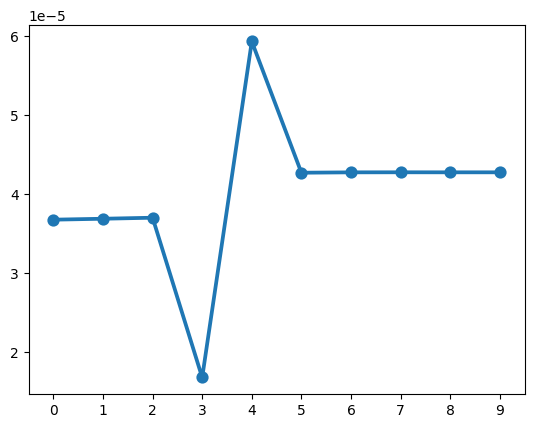

In [710]:
import seaborn as sns 

sns.pointplot(dif_YM_OSM_Lat)
dif_YM_OSM_Lat

[4.877081185128418e-05,
 4.889730779211732e-05,
 4.899927037627094e-05,
 -0.0006270633611293874,
 4.760065434794569e-05,
 7.270119580482515e-05,
 7.26122336516255e-05,
 7.260944632037081e-05,
 7.262007171959795e-05,
 7.262743191205345e-05]

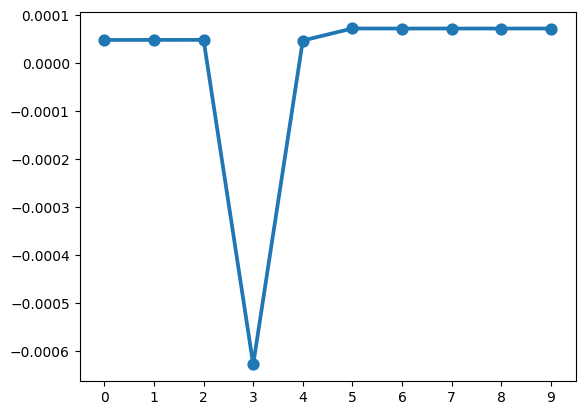

In [712]:
dif_YM_OSM_Lon = []

for i in range(len(Lon_YM)):
    dif_YM_OSM_Lon.append(Lon_YM[i] - Lon_OSM[i])
    

sns.pointplot(dif_YM_OSM_Lon)
dif_YM_OSM_Lon

<Axes: >

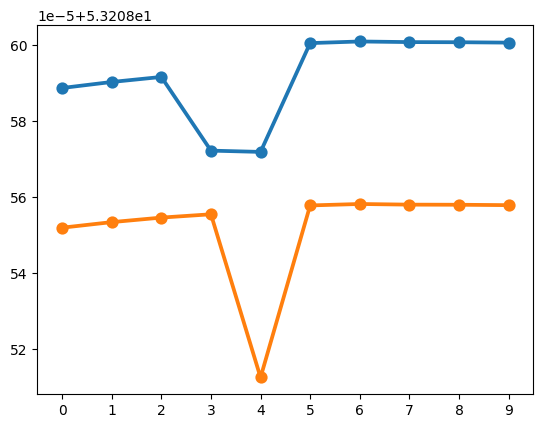

In [713]:
sns.pointplot(Lat_YM)

sns.pointplot(Lat_OSM)

<Axes: >

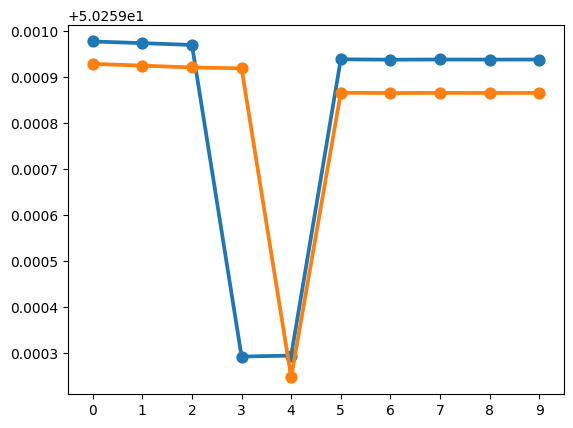

In [714]:
sns.pointplot(Lon_YM)

sns.pointplot(Lon_OSM)

In [715]:
import numpy as np
a = np.mean(dif_YM_OSM_Lat)
b = np.mean(dif_YM_OSM_Lon)
b

np.float64(-6.9624937353296446e-06)

<Axes: >

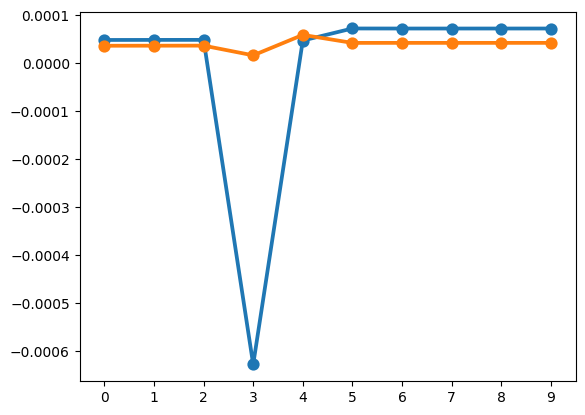

In [716]:
sns.pointplot(dif_YM_OSM_Lon)
sns.pointplot(dif_YM_OSM_Lat)

<Axes: >

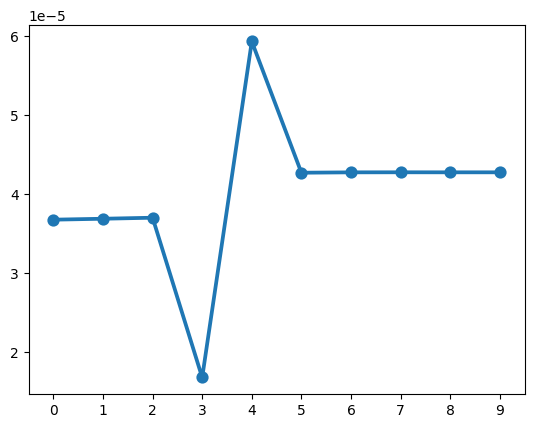

In [717]:
sns.pointplot(dif_YM_OSM_Lat)

In [718]:
dif_YM_OSM_Lat

[3.673880917887118e-05,
 3.685793043928243e-05,
 3.6987090616946716e-05,
 1.674020553821265e-05,
 5.932249771944953e-05,
 4.269014510072111e-05,
 4.273765274120933e-05,
 4.274453660713107e-05,
 4.274003041615515e-05,
 4.274061944897767e-05]

In [719]:
Lat_OSM = []
Lon_OSM = []

Lat_YM = []
Lon_YM = []

In [720]:
with open('locs_osm.txt', 'r') as f:
    nums = f.read().splitlines()

for i in range(len(nums)):
    
    Lat_OSM.append(float(nums[0].split(',')[0]))
    Lon_OSM.append(float(nums[0].split(',')[1]))
    
    
# print(nums[0].split(','))

In [721]:
with open('locs_yandex.txt', 'r') as f:
    nums = f.read().splitlines()

for i in range(len(nums)):
    
    Lat_YM.append(float(nums[0].split(',')[0]))
    Lon_YM.append(float(nums[0].split(',')[1]))

3.673880917887118e-05


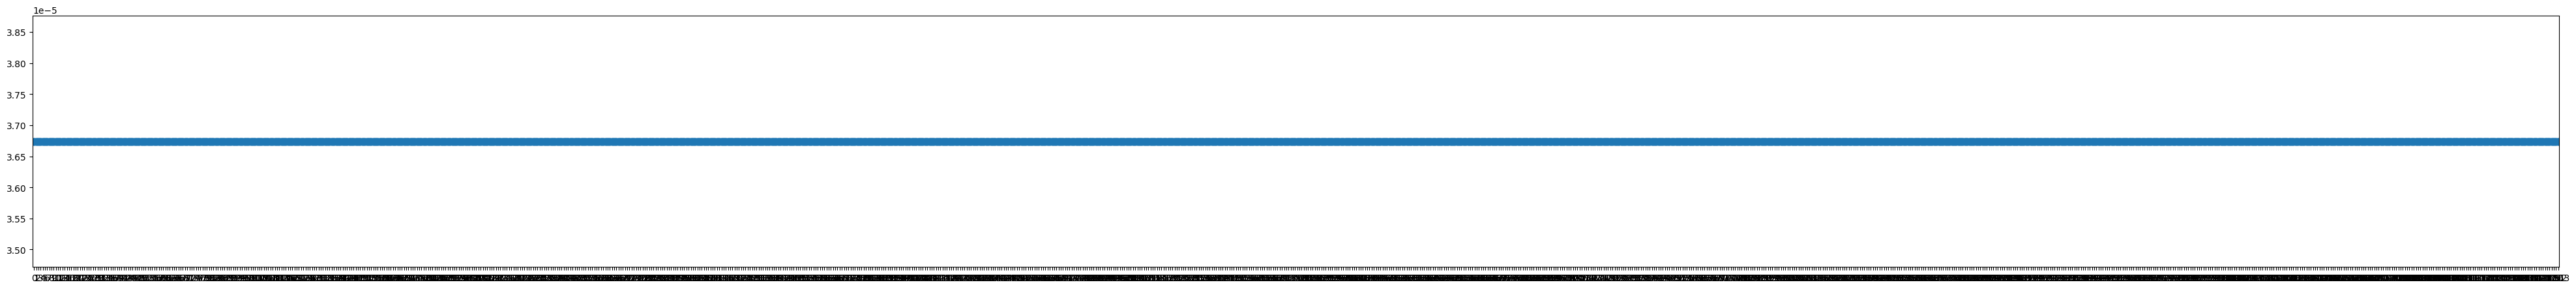

In [733]:
plt.figure(figsize=(50,5))
dif_YM_OSM_Lat= []
for i in range(len(Lon_YM)):
    dif_YM_OSM_Lat.append((Lat_YM[i] - Lat_OSM[i]))
sns.pointplot(dif_YM_OSM_Lat)

print(np.mean(dif_YM_OSM_Lat))

In [735]:
Lon_YM == Lon_OSM

False

4.877081185128418e-05


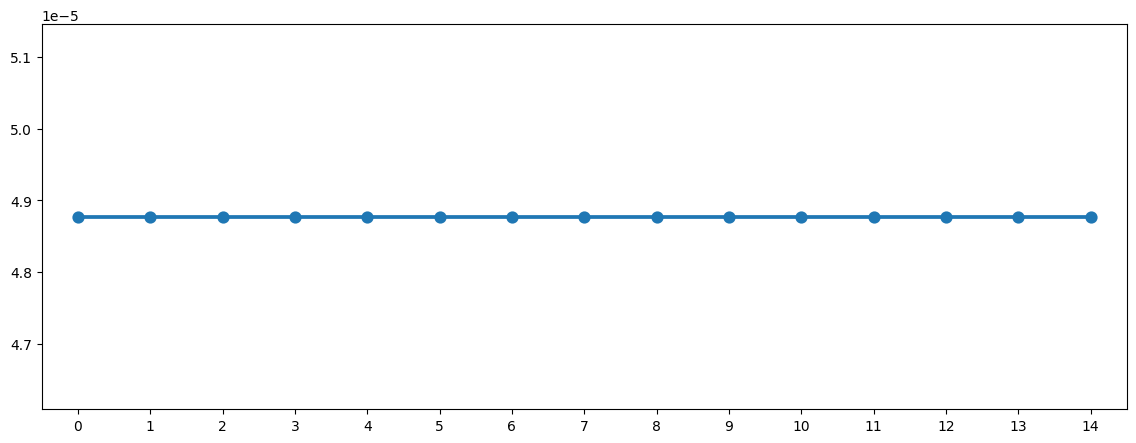

In [734]:
plt.figure(figsize=(14,5))
dif_YM_OSM_Lat= []
for i in range(len(Lon_YM)):
    dif_YM_OSM_Lat.append((Lon_YM[i] - Lon_OSM[i]))
sns.pointplot(dif_YM_OSM_Lat[20:35])

print(np.mean(dif_YM_OSM_Lat))

In [742]:
np.round(Lon_YM[0] - Lon_OSM[0], 2)


np.float64(0.0)

50.259929406086705